<div style="background-color:#1A237E;color:#FFEB3B;padding:20px;border:1px solid #3F51B5;text-align:center;">
<p><font size="14" color=#FFF9C4 face="Lora"><i> Diabetes Prediction (Healthcare Domain) </i></font> </p>
</div>

## Features
- **`1.Age:`** The risk of developing diabetes increases as individuals grow older. This can be attributed to factors such as decreased physical activity, hormonal changes, and a higher likelihood of developing other health conditions that contribute to diabetes.

- **`2.Gender:`** Gender can influence diabetes risk, though the impact may vary. Women with a history of gestational diabetes (diabetes during pregnancy) are at a higher risk of developing type 2 diabetes later in life. Some studies also suggest that men may have a slightly higher risk of diabetes compared to women.

- **`3.Body Mass Index (BMI):`**  BMI, a measure of body fat based on height and weight, serves as an indicator of diabetes risk. Higher BMI is associated with an increased likelihood of developing type 2 diabetes. Excessive body fat, particularly around the waist, can lead to insulin resistance, impairing the body's ability to regulate blood sugar levels.

- **`4.Hypertension:`**  Hypertension, or high blood pressure, often coexists with diabetes. These conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes, and vice versa. Both conditions can adversely affect cardiovascular health.

- **`5.Heart Disease:`**  Heart disease, encompassing conditions like coronary artery disease and heart failure, is linked to an elevated risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning having one condition increases the risk of developing the other. Shared risk factors such as obesity, high blood pressure, and high cholesterol contribute to this association.

- **`6.Smoking History:`**  Smoking is a modifiable risk factor for diabetes. Cigarette smoking raises the risk of developing type 2 diabetes. Smoking contributes to insulin resistance and impairs glucose metabolism. Quitting smoking significantly reduces the risk of diabetes and its complications.

- **`7.HbA1c Level:`**  HbA1c (glycated hemoglobin) reflects average blood glucose levels over the past 2-3 months. Higher HbA1c levels indicate poorer long-term blood sugar control and are associated with an increased risk of developing diabetes and its complications.

- **`8.Blood Glucose Level:`**  Blood glucose level refers to the amount of sugar present in the blood at a given time. Elevated blood glucose levels, especially during fasting or after consuming carbohydrates, indicate impaired glucose regulation and heighten the risk of developing diabetes. Regular monitoring of blood glucose levels is crucial for diabetes diagnosis and management.

## *`Importing the Required Libraries`*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the diabetes database.
diabetes = pd.read_csv(r"D:\Data\Machine_Learning\diabetes_dataset.csv")

In [3]:
diabetes.head(10)# Checking the head of the dataframe

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
# Checking the Info() of the dataframe.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# checking the descritive statistics of the data.
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Checking the shape of the dataframe.
diabetes.shape

(100000, 9)

## *`Exploratory Data Analysis`*

### *`Checking Duplicates`*

In [7]:
# Checking if any duplicates are present in the dataframe.
diabetes.duplicated().value_counts()

False    96146
True      3854
dtype: int64

In [8]:
# Identifying the duplicates from the data.
diabetes[diabetes.duplicated()].head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0


In [9]:
diabetes[(diabetes.gender == 'Male') & (diabetes.HbA1c_level==6.6) & (diabetes.bmi == 27.32) & (diabetes.age == 80.0)
        & (diabetes.blood_glucose_level == 159)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1116,Male,80.0,0,0,No Info,27.32,6.6,159,0
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
12440,Male,80.0,0,0,No Info,27.32,6.6,159,0
54794,Male,80.0,0,0,No Info,27.32,6.6,159,0
61148,Male,80.0,0,0,never,27.32,6.6,159,0
75961,Male,80.0,0,0,No Info,27.32,6.6,159,0
97482,Male,80.0,1,1,No Info,27.32,6.6,159,0


In [10]:
# Dropping the duplicates from the dataframe.
diabetes.drop_duplicates(keep='first', inplace=True, ignore_index=True)

### *`Checking Null values`*

In [11]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### *`Checking If any corrupted values are present`*

In [12]:
# Identifying the corrupted values by seeing info() of the data.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.6+ MB


In [13]:
print('Mean of all numerical columns:')
diabetes.mean()
print('Median of all numerical columns:')
diabetes.median()
print('Mode of all categorical columns:')
diabetes.mode()

Mean of all numerical columns:


age                     41.794326
hypertension             0.077601
heart_disease            0.040803
bmi                     27.321461
HbA1c_level              5.532609
blood_glucose_level    138.218231
diabetes                 0.088220
dtype: float64

Median of all numerical columns:


age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64

Mode of all categorical columns:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,0,never,27.32,6.6,159,0


### *`Checking or Identifying the outliers`*

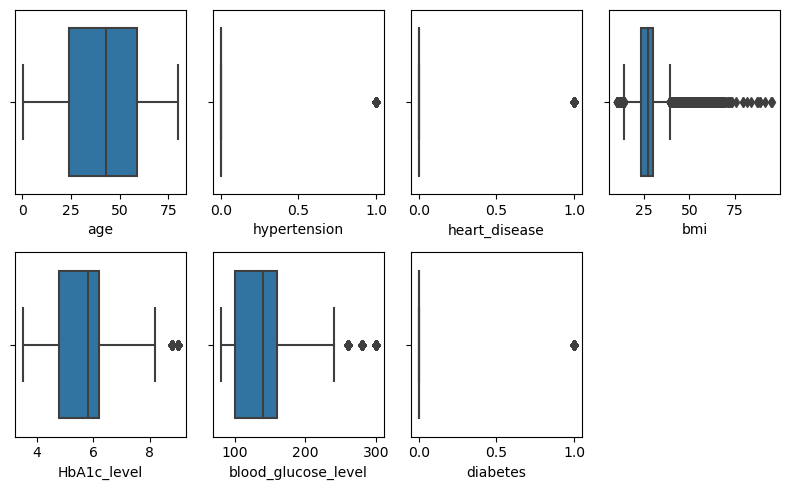

In [14]:
lst = diabetes.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))

for i, ax in enumerate(axes.flatten()):
    if i < len(lst):
        sns.boxplot(x=diabetes[lst[i]], ax=ax)
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show();

### *`Observations:`*
- In the bmi column there are more outliers compared to the another columns in the dataset.

In [15]:
# Checking the outliers using the boxplot method.
Q1,Q2,Q3 = tuple(diabetes.bmi.quantile(q=[0.10,0.50,0.90]).values)

# Checking the missing values
print(Q1,Q2,Q3)

# Calculating the IQR value and for calculating the LL and UL.
IQR = Q3-Q1

# Checking the outliers in lowerlimit(LL).
UL = Q3+1.5*IQR

# Checking the outliers in upperlimit(UL).
LL = Q1-1.5*IQR

print(IQR,UL,LL)

19.0 27.32 35.7
16.700000000000003 60.75000000000001 -6.050000000000004


In [16]:
# This are not outliers but those are failing in outliers.
# This are premium bikes in bikewale website. 

diabetes[(diabetes.bmi < LL) | (diabetes.bmi > UL)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59,Female,67.0,0,0,never,63.48,8.8,155,1
562,Male,43.0,0,0,never,69.37,7.5,130,1
2072,Male,18.0,0,0,current,65.93,6.0,200,0
2173,Female,41.0,0,0,never,65.56,4.5,200,0
2677,Female,36.0,0,0,current,63.74,6.5,280,1
...,...,...,...,...,...,...,...,...,...
90413,Female,23.0,0,0,never,67.49,6.0,130,0
92488,Male,80.0,0,0,never,88.76,6.2,140,0
93053,Female,38.0,0,0,never,64.26,6.2,100,0
93143,Female,25.0,0,0,never,64.27,4.5,126,0


- These are the outliers present in the diabetes dataset.

### *`Applying the log transformations for treating the outliers`*

In [17]:
np.log(diabetes.bmi)

0        3.226447
1        3.307619
2        3.307619
3        3.154870
4        3.002708
           ...   
96141    3.202746
96142    2.854745
96143    3.326115
96144    3.567277
96145    3.110399
Name: bmi, Length: 96146, dtype: float64

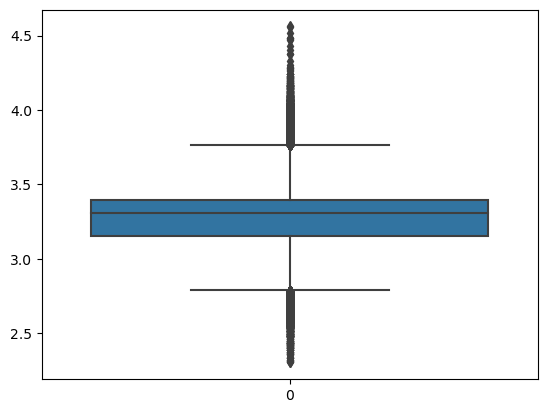

In [18]:
# After converting to the log outliers are increased.
sns.boxplot(np.log(diabetes.bmi));

### *`Applying the Boxcox transformations for treating the outliers`*

In [19]:
from scipy.stats import boxcox
x,y = boxcox(diabetes.bmi)

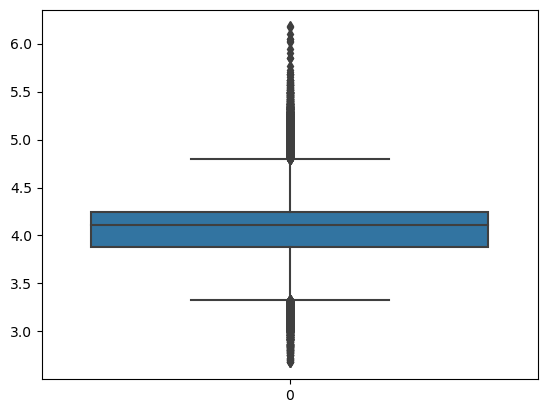

In [20]:
sns.boxplot(x);

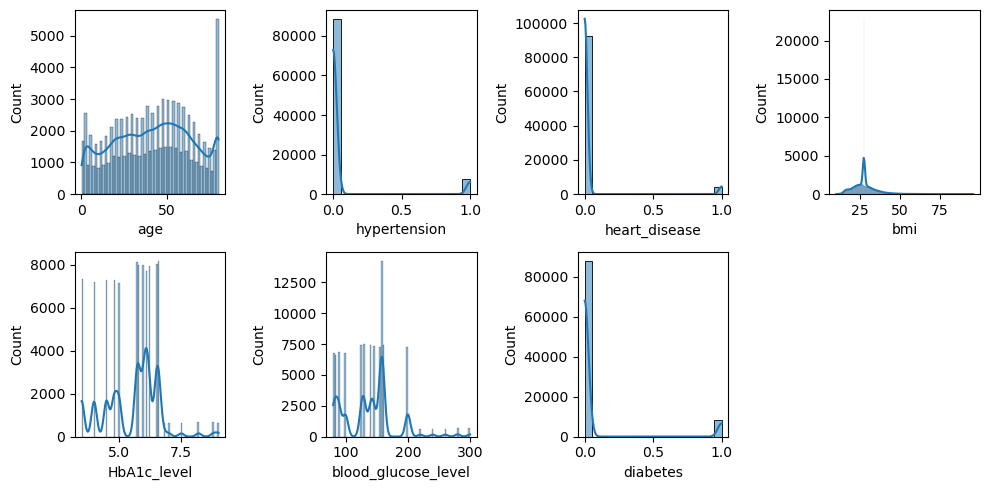

In [21]:
lst = diabetes.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

for i, ax in enumerate(axes.flatten()):
    if i < len(lst):
        sns.histplot(x=diabetes[lst[i]], ax=ax, kde=True)
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show();

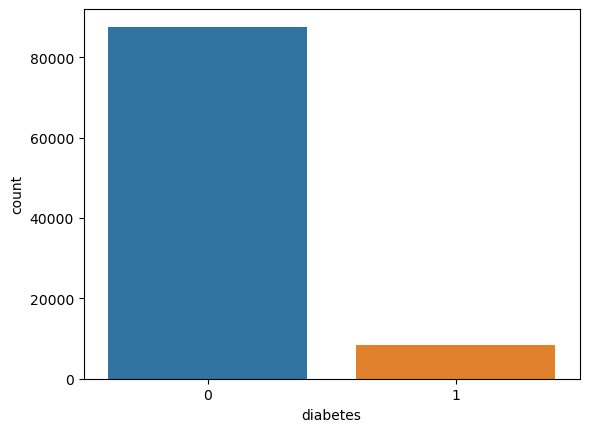

In [22]:
sns.countplot(x=diabetes.diabetes);

### 🌟`Important Observations` :
- There is a huge imbalance in the dataset and most fo the data points are falling under the `class 0` and very less are falling in the `class 1`.

In [23]:
# checking how many datapoints are present in the class_0 and class_1.
diabetes.diabetes.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

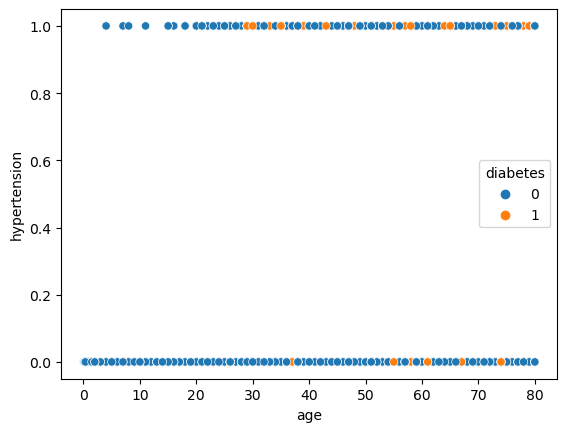

In [24]:
sns.scatterplot(x=diabetes.age, y=diabetes.hypertension, hue=diabetes.diabetes);

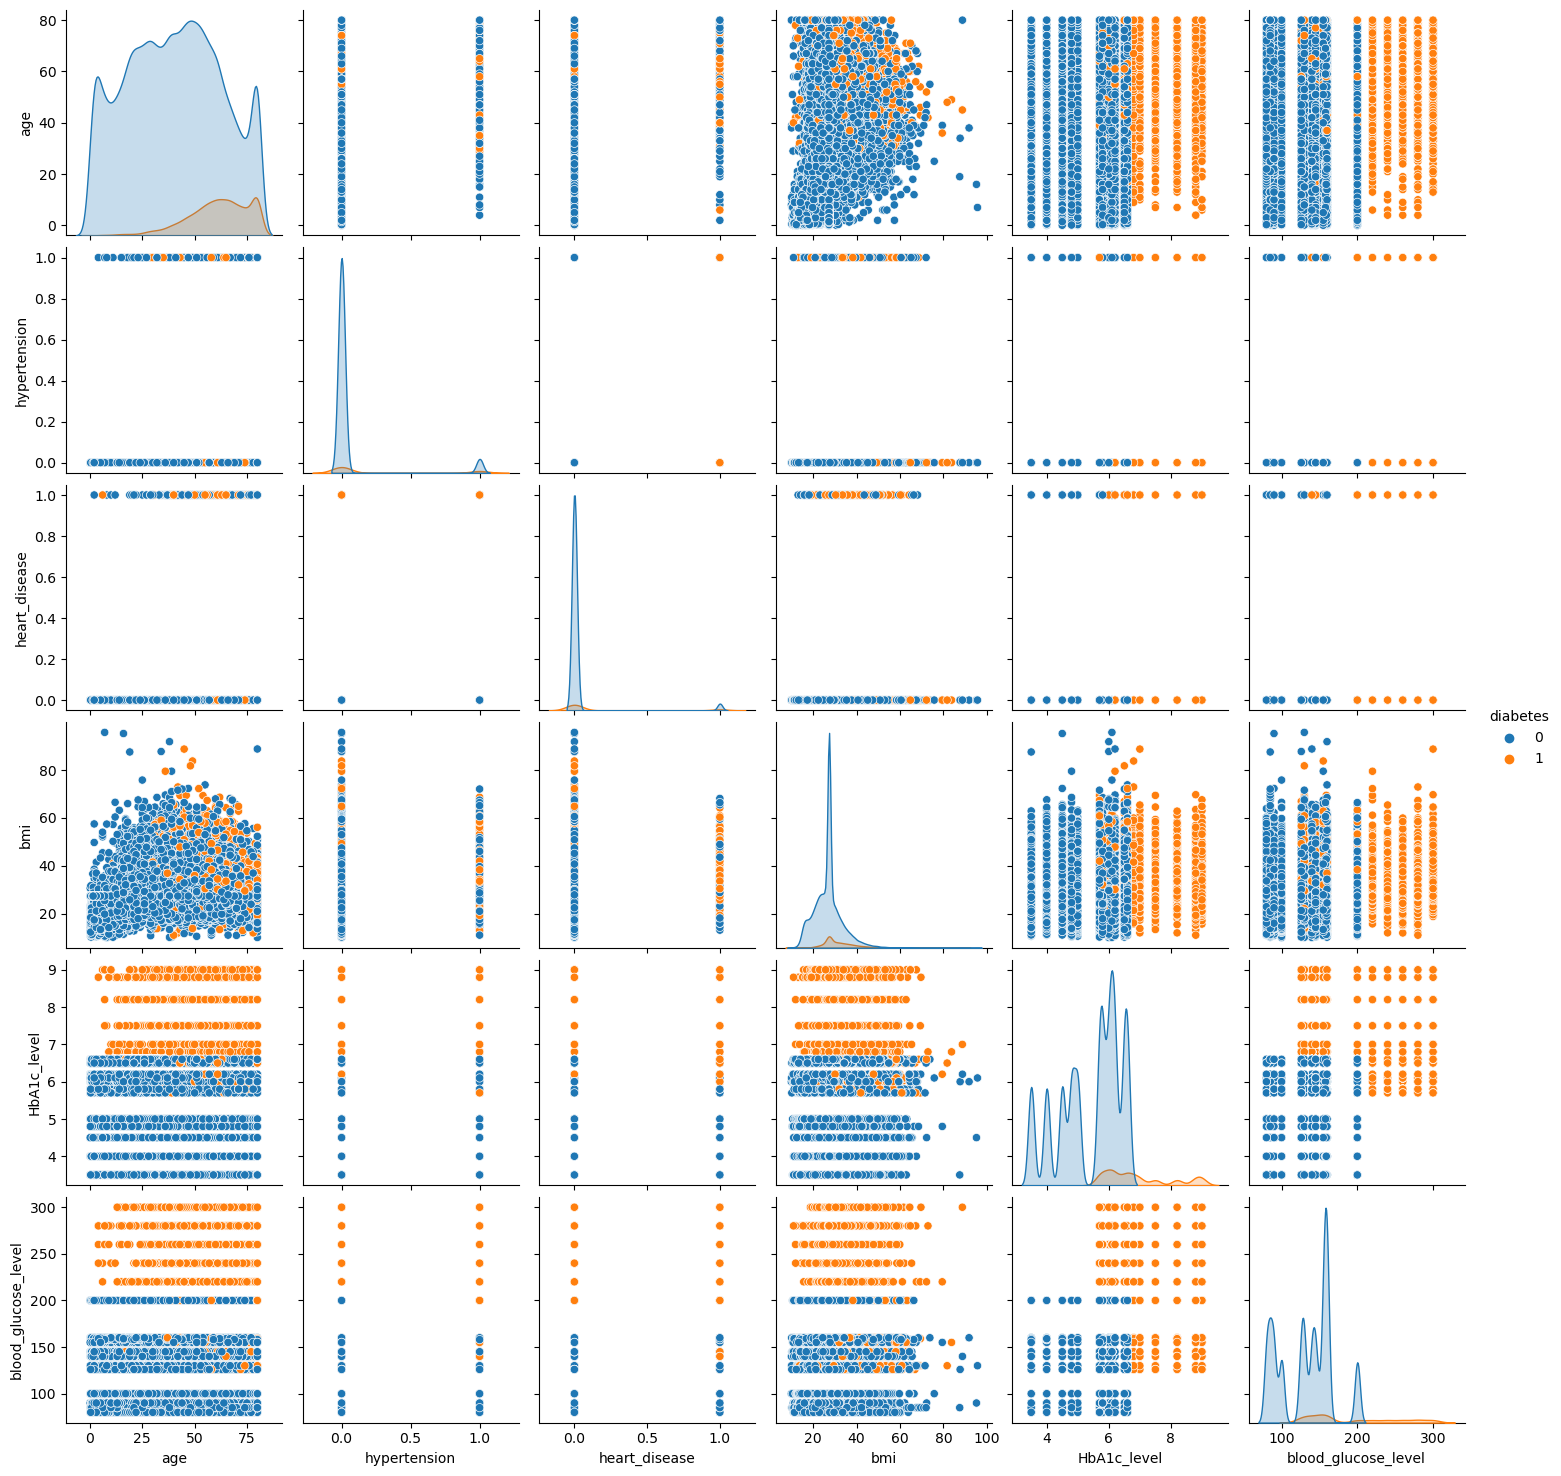

In [25]:
sns.pairplot(diabetes, hue='diabetes');

### 🌟`Important Observations` :
1. The people who has **`blood glucose level is above 200`** with respect to **`age, bmi and HbA1c_level`** those are most affected by the diabetes.
2. The people who has **`HbA1c_level is above 7`** those are affected by diabetes.
3. All the features are importent to wheather the person is affected with diabetes are not.

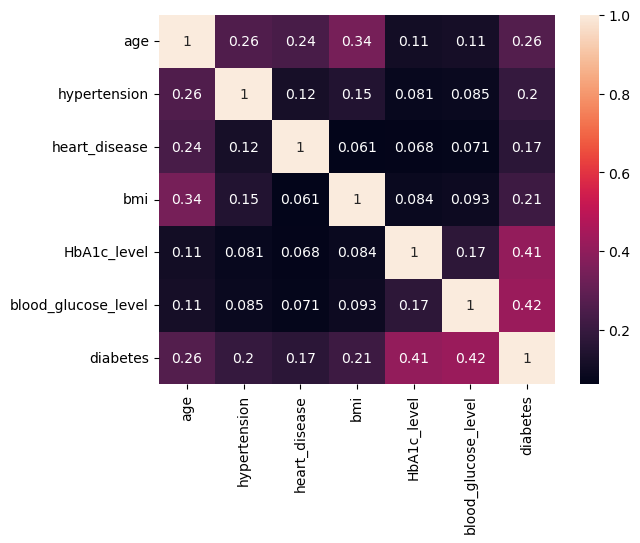

In [26]:
sns.heatmap(diabetes.corr(), annot=True);

### 🌟`Important Observations` :
- blood glucose level, diabetes are highly positively correlated with 0.42 and HbA1c level, diabetes are also highly positively correlated with 0.41.

## *`Model Buliding`*

### *`Separating the input and output variables`*

In [27]:
x = diabetes.drop(['diabetes'], axis=1)
y = diabetes.diabetes

In [28]:
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


### `Applying the traintestsplit for train and test data`

In [29]:
# Applying the train test split to split the data into train and test means x_train, x_test, y_train and y_test data.
# for these i have used 75:25 split means 75% train data and 25% test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [30]:
# Checking the shapes of x_train, x_test, y_train and y_test.
# Observing the how many datapoints are present in the train data and test data.
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(72109, 8) (72109,)
(24037, 8) (24037,)


### `Applying preprocessing on train data`

In [31]:
# Separating the numerical coulmns from the x_train data using select_dtypes.
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
5096,14.0,0,0,21.80,3.5,126
33671,21.0,0,0,44.09,5.0,140
30919,13.0,0,0,17.16,6.5,126
20433,25.0,0,0,27.32,4.0,100
4005,17.0,0,0,22.88,4.0,158


### `Rescaling the Numerical Features`

In [32]:
from sklearn.preprocessing import StandardScaler # Importing the standardscaler from sklearn.preprocessing.
scalar = StandardScaler() # Creating the scaler object for the class.
# Taking the scalar object and using fit_transform we are rescaling the data.
x_train_num_transformed = pd.DataFrame(scalar.fit_transform(x_train_num),
                                      columns=x_train_num.columns,
                                      index= x_train_num.index)

In [33]:
x_train_num_transformed.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
5096,-1.236488,-0.28882,-0.205214,-0.811076,-1.897985,-0.295729
33671,-0.924968,-0.28882,-0.205214,2.476395,-0.497969,0.046761
30919,-1.280991,-0.28882,-0.205214,-1.495412,0.902046,-0.295729
20433,-0.746956,-0.28882,-0.205214,0.003049,-1.431313,-0.931781
4005,-1.102980,-0.28882,-0.205214,-0.651790,-1.431313,0.487105


In [34]:
# Separating the categorical coulmns from the x_train data using select_dtypes.
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat.head()

,gender,smoking_history
5096,Female,No Info
33671,Male,never
30919,Female,No Info
20433,Female,No Info
4005,Male,No Info


### `Rescaling the Categorical Features`

In [35]:
# OneHotEncoding the categorical features
# Importing the OneHotEncoder from sklearn.preprocessing.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False) # Creating the encoder object for the class.
# Taking the encoder object and using fit_transform we are rescaling the data.
x_train_cat_transformed = pd.DataFrame(encoder.fit_transform(x_train_cat),
                                      columns=encoder.get_feature_names_out(x_train_cat.columns),
                                      index=x_train_cat.index)

In [36]:
x_train_cat_transformed.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
5096,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33671,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30919,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20433,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4005,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
x_train_transformed = pd.concat([x_train_num_transformed, x_train_cat_transformed], axis=1)

x_train_transformed.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
5096,-1.236488,-0.28882,-0.205214,-0.811076,-1.897985,-0.295729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33671,-0.924968,-0.28882,-0.205214,2.476395,-0.497969,0.046761,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30919,-1.280991,-0.28882,-0.205214,-1.495412,0.902046,-0.295729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20433,-0.746956,-0.28882,-0.205214,0.003049,-1.431313,-0.931781,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4005,-1.102980,-0.28882,-0.205214,-0.651790,-1.431313,0.487105,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### `Applying preprocessing on test data`

In [38]:
# Separating the numerical coulmns from the x_train data using select_dtypes.
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
2547,5.0,0,0,15.14,4.5,90
34242,19.0,0,0,22.74,6.6,85
69022,52.0,0,0,24.27,7.5,220
49536,55.0,0,0,27.32,5.7,85
78171,22.0,0,0,28.78,4.5,200


### `Rescaling the Numerical Features`

In [39]:
from sklearn.preprocessing import StandardScaler # Importing the standardscaler from sklearn.preprocessing.
scaler = StandardScaler() # Creating the scaler object for the class.
# Taking the scalar object and using fit_transform we are rescaling the data.
x_test_num_transformed = pd.DataFrame(scaler.fit_transform(x_test_num),
                                      columns=x_test_num.columns,
                                      index= x_test_num.index)

In [40]:
x_test_num_transformed.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
2547,-1.641002,-0.293719,-0.209323,-1.820085,-0.954762,-1.185421
34242,-1.017114,-0.293719,-0.209323,-0.690692,0.992148,-1.307360
69022,0.453480,-0.293719,-0.209323,-0.463328,1.826537,1.984981
49536,0.587170,-0.293719,-0.209323,-0.010085,0.157758,-1.307360
78171,-0.883423,-0.293719,-0.209323,0.206878,-0.954762,1.497227


In [41]:
# Separating the categorical coulmns from the x_train data using select_dtypes.
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cat.head()

,gender,smoking_history
2547,Female,No Info
34242,Male,never
69022,Female,never
49536,Male,No Info
78171,Female,never


### `Rescaling the Categorical Features`

In [42]:
# OneHotEncoding the categorical features
# Importing the OneHotEncoder from sklearn.preprocessing.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False) # Creating the encoder object for the class.
# Taking the encoder object and using fit_transform we are rescaling the data.
x_test_cat_transformed = pd.DataFrame(encoder.fit_transform(x_test_cat),
                                      columns=encoder.get_feature_names_out(x_test_cat.columns),
                                      index=x_test_cat.index)

In [43]:
x_test_cat_transformed.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
2547,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34242,1.0,0.0,0.0,0.0,0.0,1.0,0.0
69022,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49536,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78171,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
x_test_transformed = pd.concat([x_test_num_transformed, x_test_cat_transformed], axis=1)

x_test_transformed.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
2547,-1.641002,-0.293719,-0.209323,-1.820085,-0.954762,-1.185421,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34242,-1.017114,-0.293719,-0.209323,-0.690692,0.992148,-1.307360,1.0,0.0,0.0,0.0,0.0,1.0,0.0
69022,0.453480,-0.293719,-0.209323,-0.463328,1.826537,1.984981,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49536,0.587170,-0.293719,-0.209323,-0.010085,0.157758,-1.307360,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78171,-0.883423,-0.293719,-0.209323,0.206878,-0.954762,1.497227,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### `Treating the Imbalance in the data`

In [45]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from collections import Counter

In [46]:
# Resampling the minority class_1. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
x_train_sm, y_train_sm = sm.fit_resample(x_train_transformed, y_train)

In [47]:
print('Number of Classes before performing the Sampling {}'.format(Counter(y_train)))
print('Number of Classes after performing the Sampling {}'.format(Counter(y_train_sm)))

Number of Classes before performing the Sampling Counter({0: 65794, 1: 6315})
Number of Classes after performing the Sampling Counter({0: 65794, 1: 65794})


In [48]:
x_train_sm.shape
y_train_sm.shape

(131588, 13)

(131588,)

In [49]:
# Resampling the minority class_1. The strategy can be changed as required.
blm = BorderlineSMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
x_train_blm, y_train_blm = blm.fit_resample(x_train_transformed, y_train)

In [50]:
print('Number of Classes before performing the Sampling {}'.format(Counter(y_train)))
print('Number of Classes after performing the Sampling {}'.format(Counter(y_train_blm)))

Number of Classes before performing the Sampling Counter({0: 65794, 1: 6315})
Number of Classes after performing the Sampling Counter({0: 65794, 1: 65794})


In [51]:
x_train_blm.shape
y_train_blm.shape

(131588, 13)

(131588,)

- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning. ADASYN is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

In [52]:
# Resampling the minority class_1. The strategy` can be changed as required.
ads = ADASYN(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
x_train_ads, y_train_ads = ads.fit_resample(x_train_transformed, y_train)

In [53]:
print('Number of Classes before performing the Sampling {}'.format(Counter(y_train)))
print('Number of Classes after performing the Sampling {}'.format(Counter(y_train_ads)))

Number of Classes before performing the Sampling Counter({0: 65794, 1: 6315})
Number of Classes after performing the Sampling Counter({0: 65794, 1: 65629})


In [54]:
x_train_ads.shape
y_train_ads.shape

(131423, 13)

(131423,)

In [55]:
# Resampling the minority class_1. The strategy can be changed as required.
svms = SVMSMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
x_train_svms, y_train_svms = svms.fit_resample(x_train_transformed, y_train)

In [56]:
print('Number of Classes before performing the Sampling {}'.format(Counter(y_train)))
print('Number of Classes after performing the Sampling {}'.format(Counter(y_train_svms)))

Number of Classes before performing the Sampling Counter({0: 65794, 1: 6315})
Number of Classes after performing the Sampling Counter({0: 65794, 1: 65794})


In [59]:
x_train_svms.shape
y_train_svms.shape

(131588, 13)

(131588,)

## *`Model Buliding and Training the model`*
### *`Logistics Regression with Smote Technique`*

In [82]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [83]:
y_test_predicted = lr_classifier.predict(x_test_transformed)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})
df.head()

,Actual,Predicted
2547,0,0
34242,0,0
69022,1,1
49536,0,0
78171,0,0


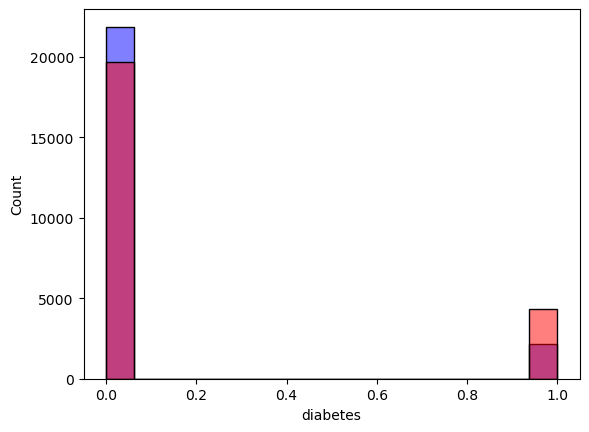

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

Confussion Matrix: 


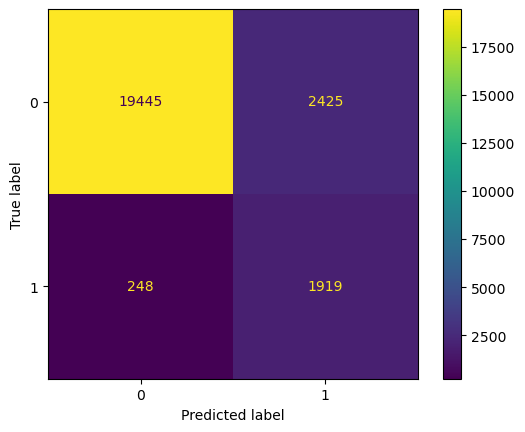

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     21870
           1       0.44      0.89      0.59      2167

    accuracy                           0.89     24037
   macro avg       0.71      0.89      0.76     24037
weighted avg       0.94      0.89      0.90     24037



In [85]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

### *`Logistics Regression with Borderline Smote Technique`*

In [86]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train_blm, y_train_blm)
y_test_predicted = lr_classifier.predict(x_test_transformed)

LogisticRegression()

Confussion Matrix: 


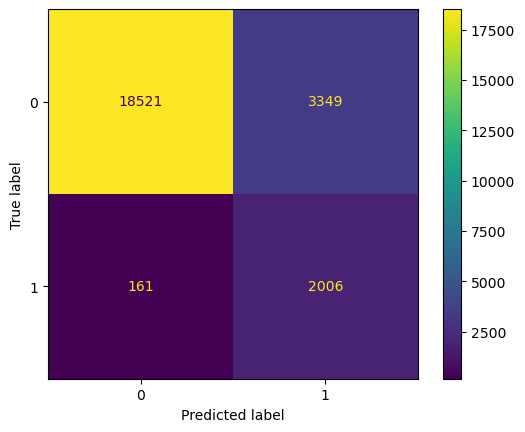

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     21870
           1       0.37      0.93      0.53      2167

    accuracy                           0.85     24037
   macro avg       0.68      0.89      0.72     24037
weighted avg       0.94      0.85      0.88     24037



In [87]:
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

### *`Logistics Regression with ADASYN Technique`*

In [88]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train_ads, y_train_ads)
y_test_predicted = lr_classifier.predict(x_test_transformed)

LogisticRegression()

Confussion Matrix: 


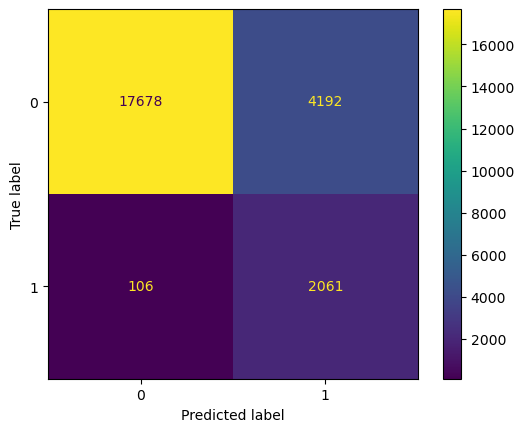

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     21870
           1       0.33      0.95      0.49      2167

    accuracy                           0.82     24037
   macro avg       0.66      0.88      0.69     24037
weighted avg       0.93      0.82      0.86     24037



In [89]:
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [90]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train_blm, y_train_blm)
y_test_predicted = lr_classifier.predict(x_test_transformed)

LogisticRegression()

Confussion Matrix: 


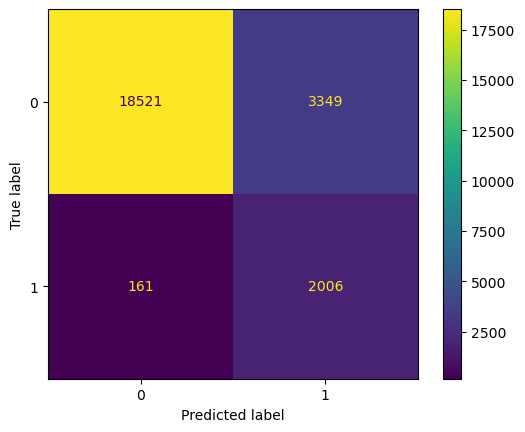

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     21870
           1       0.37      0.93      0.53      2167

    accuracy                           0.85     24037
   macro avg       0.68      0.89      0.72     24037
weighted avg       0.94      0.85      0.88     24037



In [91]:
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [92]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train_svms, y_train_svms)
y_test_predicted = lr_classifier.predict(x_test_transformed)

LogisticRegression()

Confussion Matrix: 


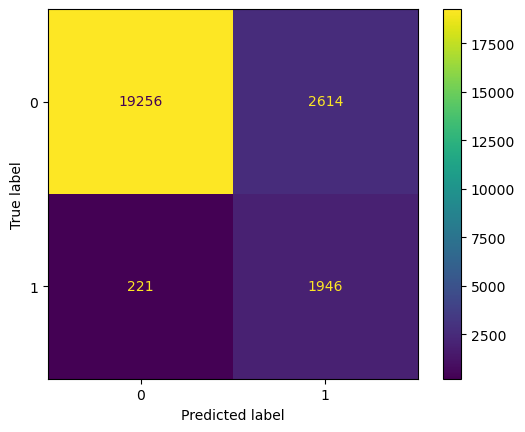

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     21870
           1       0.43      0.90      0.58      2167

    accuracy                           0.88     24037
   macro avg       0.71      0.89      0.75     24037
weighted avg       0.94      0.88      0.90     24037



In [93]:
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

### *DecisionTree Classifier*

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
dtc_classifier.fit(x_train_svms, y_train_svms)
y_test_predicted = dtc_classifier.predict(x_test_transformed)

DecisionTreeClassifier()

Confussion Matrix: 


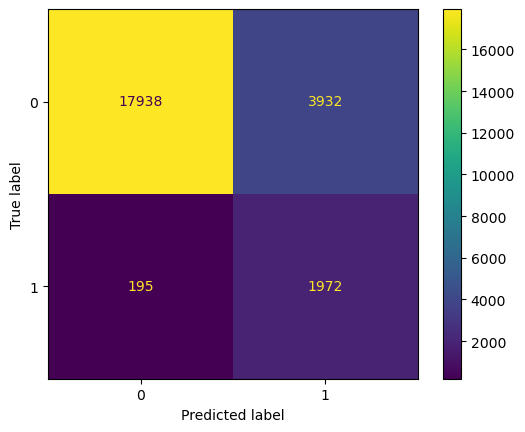

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     21870
           1       0.33      0.91      0.49      2167

    accuracy                           0.83     24037
   macro avg       0.66      0.87      0.69     24037
weighted avg       0.93      0.83      0.86     24037



In [95]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
dtc_classifier.fit(x_train_sm, y_train_sm)
y_test_predicted = dtc_classifier.predict(x_test_transformed)

DecisionTreeClassifier()

Confussion Matrix: 


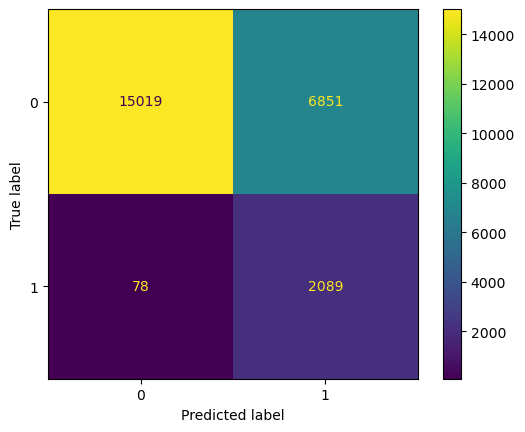

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     21870
           1       0.23      0.96      0.38      2167

    accuracy                           0.71     24037
   macro avg       0.61      0.83      0.59     24037
weighted avg       0.93      0.71      0.77     24037



In [97]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
dtc_classifier.fit(x_train_blm, y_train_blm)
y_test_predicted = dtc_classifier.predict(x_test_transformed)

DecisionTreeClassifier()

Confussion Matrix: 


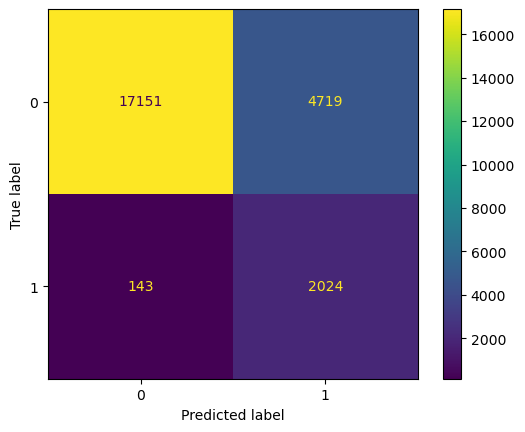

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.78      0.88     21870
           1       0.30      0.93      0.45      2167

    accuracy                           0.80     24037
   macro avg       0.65      0.86      0.67     24037
weighted avg       0.93      0.80      0.84     24037



In [99]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
dtc_classifier.fit(x_train_ads, y_train_ads)
y_test_predicted = dtc_classifier.predict(x_test_transformed)

DecisionTreeClassifier()

Confussion Matrix: 


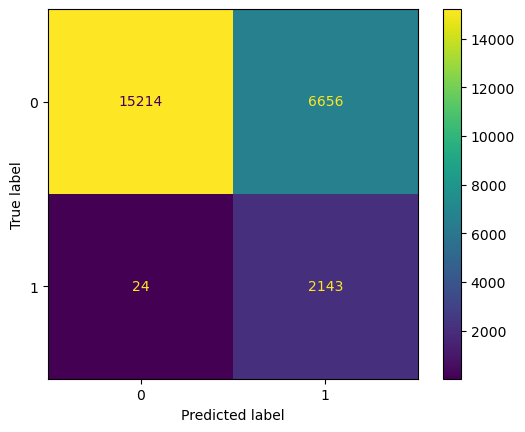

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     21870
           1       0.24      0.99      0.39      2167

    accuracy                           0.72     24037
   macro avg       0.62      0.84      0.61     24037
weighted avg       0.93      0.72      0.78     24037



In [101]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

### *Randomforest Classifier*

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train_svms, y_train_svms)
y_test_predicted = rfc_classifier.predict(x_test_transformed)

RandomForestClassifier()

Confussion Matrix: 


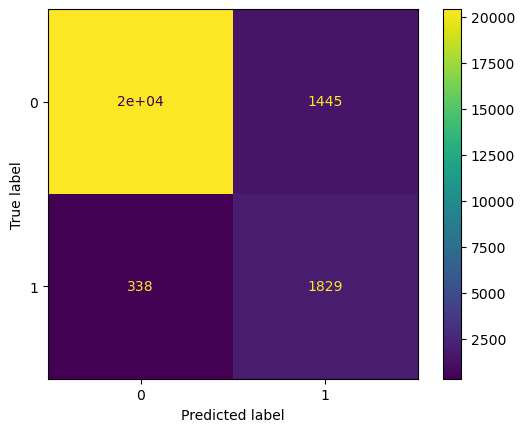

classification report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     21870
           1       0.56      0.84      0.67      2167

    accuracy                           0.93     24037
   macro avg       0.77      0.89      0.82     24037
weighted avg       0.95      0.93      0.93     24037



In [103]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train_sm, y_train_sm)
y_test_predicted = rfc_classifier.predict(x_test_transformed)

RandomForestClassifier()

Confussion Matrix: 


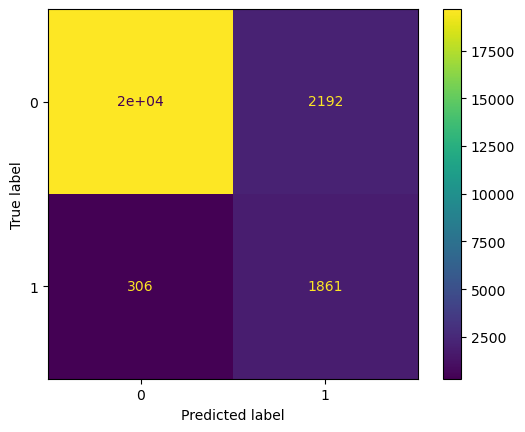

classification report: 
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     21870
           1       0.46      0.86      0.60      2167

    accuracy                           0.90     24037
   macro avg       0.72      0.88      0.77     24037
weighted avg       0.94      0.90      0.91     24037



In [105]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train_blm, y_train_blm)
y_test_predicted = rfc_classifier.predict(x_test_transformed)

RandomForestClassifier()

Confussion Matrix: 


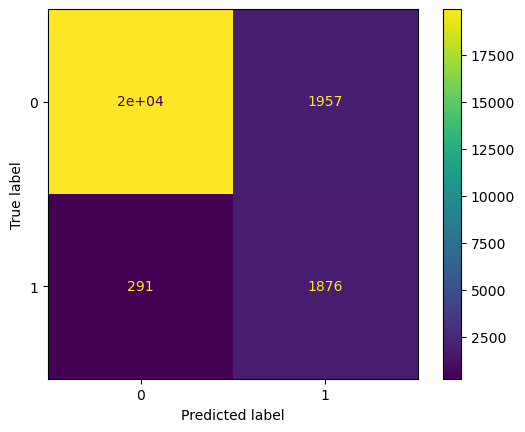

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     21870
           1       0.49      0.87      0.63      2167

    accuracy                           0.91     24037
   macro avg       0.74      0.89      0.79     24037
weighted avg       0.94      0.91      0.92     24037



In [107]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ')
print(metrics.classification_report(y_test, y_test_predicted))

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train_ads, y_train_ads)
y_test_predicted = rfc_classifier.predict(x_test_transformed)

RandomForestClassifier()

Confussion Matrix: 


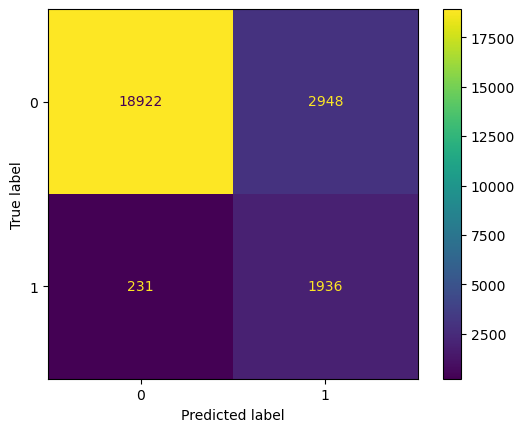

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     21870
           1       0.40      0.89      0.55      2167

    accuracy                           0.87     24037
   macro avg       0.69      0.88      0.74     24037
weighted avg       0.93      0.87      0.89     24037



In [112]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')

In [69]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=42, sampling_strategy='not majority')

In [70]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21870
           1       0.92      0.70      0.80      2167

    accuracy                           0.97     24037
   macro avg       0.95      0.85      0.89     24037
weighted avg       0.97      0.97      0.97     24037



### *`Hyperparameter Tuning`*

In [113]:
from sklearn.model_selection import GridSearchCV

In [127]:
tuned_parameter = {'n_estimators':[x for x in range(1,101)]}
clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=tuned_parameter, 
    scoring='recall',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(x_train_svms,y_train_svms)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='recall', verbose=1)

In [128]:
clf.best_estimator_
clf.best_params_

RandomForestClassifier(n_estimators=97)

{'n_estimators': 97}

In [129]:
clf.score(x_test_transformed, y_test)

0.8495616059067835

In [130]:
resluts = pd.DataFrame(clf.cv_results_)

In [131]:
resluts

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103591,0.015897,0.010611,0.001006,1,{'n_estimators': 1},0.862984,0.928414,0.940877,0.995668,...,0.944950,0.049538,99,0.984972,0.982768,0.983319,0.982502,0.980279,0.982768,0.001512
1,0.195858,0.007469,0.013886,0.000840,2,{'n_estimators': 2},0.818071,0.877878,0.882970,0.993920,...,0.912698,0.068883,100,0.976594,0.969051,0.967379,0.964815,0.965764,0.968721,0.004193
2,0.292346,0.032627,0.017571,0.001908,3,{'n_estimators': 3},0.907212,0.964283,0.960331,0.999392,...,0.966137,0.033841,96,0.996523,0.993369,0.993730,0.993902,0.994357,0.994376,0.001119
3,0.378405,0.021170,0.020549,0.002704,4,{'n_estimators': 4},0.873091,0.939585,0.945209,0.998860,...,0.951166,0.046555,98,0.993350,0.989627,0.989076,0.989456,0.990292,0.990360,0.001546
4,0.483996,0.019043,0.022956,0.001803,5,{'n_estimators': 5},0.913139,0.971502,0.973250,0.999088,...,0.971290,0.031471,93,0.998556,0.996485,0.996048,0.996789,0.996637,0.996903,0.000863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.692194,0.422687,0.377197,0.036006,96,{'n_estimators': 96},0.926514,0.986549,0.988829,0.999924,...,0.980287,0.027434,29,1.000000,0.999430,0.999582,0.999525,0.999639,0.999635,0.000195
96,11.494343,1.890016,0.352124,0.036925,97,{'n_estimators': 97},0.928870,0.986701,0.990045,1.000000,...,0.981062,0.026617,1,1.000000,0.999563,0.999544,0.999506,0.999582,0.999639,0.000182
97,17.412820,2.146107,0.524060,0.186610,98,{'n_estimators': 98},0.927806,0.986169,0.989133,1.000000,...,0.980546,0.026941,18,0.999981,0.999525,0.999639,0.999525,0.999563,0.999647,0.000172
98,15.708897,4.846536,0.511328,0.136131,99,{'n_estimators': 99},0.928262,0.986549,0.988677,0.999924,...,0.980622,0.026751,14,1.000000,0.999563,0.999544,0.999506,0.999563,0.999635,0.000184


In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators=49)
rfc_classifier.fit(x_train_svms, y_train_svms)
y_test_predicted = rfc_classifier.predict(x_test_transformed)

RandomForestClassifier(n_estimators=49)

Confussion Matrix: 


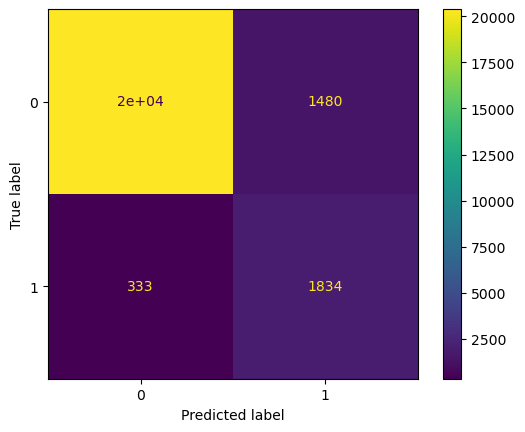

classification report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     21870
           1       0.55      0.85      0.67      2167

    accuracy                           0.92     24037
   macro avg       0.77      0.89      0.81     24037
weighted avg       0.95      0.92      0.93     24037



In [137]:
from sklearn import metrics
print('Confussion Matrix: ')
confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
# Create the ConfusionMatrixDisplay object
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
# Display the confusion matrix
display.plot()
plt.show()
print('classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')